
# Vehicle Classifier — Supervised Learning Demo
*Created by Laura aka NeuroWitchAI*  

## What is this notebook about?
This notebook is a quick introduction to **supervised learning** and **image classification** using vehicle flashcards.

Supervised learning is a type of machine learning where the model learns from **labeled data**. In this case, each image (feature) has a known vehicle type (label), and we’ll train a model to learn this relationship.

---

## What you'll learn:
- What supervised learning is and how it works
- What features and labels are
- How to build and view a dataset using labeled flashcards
- How to train a simple image classifier
- How to evaluate a model’s performance

---

## Environment Requirements:
This notebook uses Python and common ML/data science tools. Make sure your environment has:

- Python 3.8+
- `pandas`
- `matplotlib`
- `Pillow` (for images)
- Optional (for model training):
  - `scikit-learn` or `PyTorch` / `TensorFlow`

You can use a Conda environment like this:
```bash
conda create -n flashcard-env python=3.10 pandas matplotlib pillow scikit-learn
conda activate flashcard-env
````

Or install packages via pip:

```bash
pip install pandas matplotlib pillow scikit-learn
```
---




In [2]:
# import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display

In [16]:
import glob

data = []
base_path = 'flashcard_data'

for label in os.listdir(base_path):
    label_path = os.path.join(base_path, label)
    for img_file in glob.glob(label_path + '/*.jpg'):
        data.append({"filepath": img_file, "label": label})

df = pd.DataFrame(data)
df.head()


,filepath,label
0,flashcard_data/car/3 copy.jpg,car
1,flashcard_data/car/2 copy.jpg,car
2,flashcard_data/car/4 copy.jpg,car
3,flashcard_data/car/5 copy.jpg,car
4,flashcard_data/car/1 copy.jpg,car


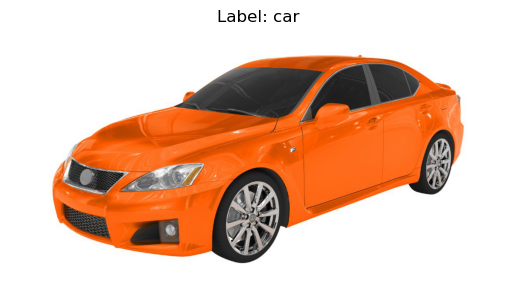

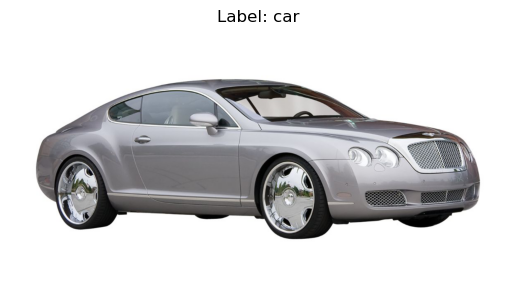

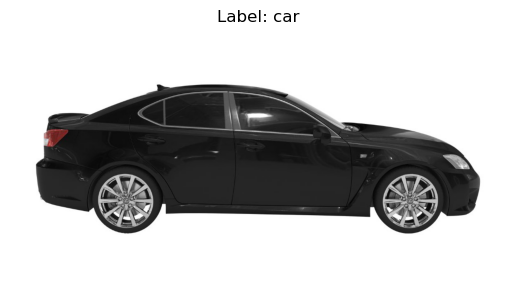

In [17]:
def show_flashcard(index):
    row = df.iloc[index]
    image = Image.open(row['filepath'])
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Label: {row['label']}")
    plt.show()

# Show first 3 flashcards
for i in range(3):
    show_flashcard(i)


In [18]:
# training a simple model
# import libraries
from sklearn.model_selection import train_test_split
# we'll talk about Random Forest in a later video
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


In [19]:
def extract_color_histogram(image, bins=(8, 8, 8)):
    # Convert to RGB and resize to fixed size (optional)
    image = image.convert('RGB').resize((128, 128))
    # Convert image to numpy array
    image_np = np.array(image)
    # Compute histogram in 3D RGB space
    hist = np.histogramdd(
        image_np.reshape(-1, 3),
        bins=bins,
        range=[(0, 256), (0, 256), (0, 256)]
    )[0]
    # Normalize and flatten
    hist = hist / hist.sum()
    return hist.flatten()


In [20]:
features = []
labels = []

for i, row in df.iterrows():
    img = Image.open(row['filepath'])
    hist = extract_color_histogram(img)
    features.append(hist)
    labels.append(row['label'])

X = np.array(features)
y = np.array(labels)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [30]:
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         bus       1.00      0.00      0.00         2
         car       0.43      1.00      0.60         3
      images       0.00      0.00      0.00         2
       truck       1.00      0.67      0.80         3

    accuracy                           0.50        10
   macro avg       0.61      0.42      0.35        10
weighted avg       0.63      0.50      0.42        10

Confusion Matrix:
[[0 2 0 0]
 [0 3 0 0]
 [0 2 0 0]
 [0 0 1 2]]


In [31]:
def predict_image(path):
    img = Image.open(path)
    hist = extract_color_histogram(img).reshape(1, -1)
    pred = model.predict(hist)
    return pred[0]

# c.jpg --> car, t.jpg --> truck, & b.jpg --> bus
# Try changing the image or testing your own to see how accurate it is!
predict_image("flashcard_data/test/c.jpg") 


'car'

---

## 🧪 Conclusion & Next Steps

In this notebook, we trained a simple supervised learning model using a **very small dataset** of vehicle images.

Because the dataset is tiny:
- The model may struggle to recognize patterns accurately
- Some labels might not be predicted at all
- Evaluation metrics like precision and recall might be unreliable

🧠 **Want better results?**
- Add **more images per class** (at least 50–100 is a good start)
- Try balancing your classes so the model sees examples from each type
- Experiment with different types of features or even deep learning!

📸 **Try it yourself:**
You can test the model with your own vehicle images! Just place them in the dataset folder and update the paths.



---

📌 This notebook is part of my NeuroWitchAI series — follow for more hands-on, beginner-friendly ML fun!